In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score
from sklearn.naive_bayes import GaussianNB


In [2]:
# Loading dataset
df = pd.read_csv('final_dataset.csv')


In [3]:
df = df[(df['age'] <20)]

In [4]:
df = df[500:748]


In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,16.810484,2.661290,2.435484,1.512097,1.967742,0.318548,3.814516,3.173387,3.266129,1.782258,2.564516,3.471774,5.250000,10.891129,10.927419,11.052419
std,1.149005,1.115856,1.081624,0.763445,0.848294,0.719409,0.976376,1.078957,1.138995,1.159788,1.424152,1.450677,8.235526,2.862617,3.017287,3.708137
min,15.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,4.000000,4.000000,2.000000,4.000000,5.000000,6.500000,13.000000,13.000000,13.250000
max,19.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,18.000000,19.000000


In [6]:
print('Rows and Columns :', df.shape,'\n' ) 

#Running info on the dataset to check on the any visible missing values and datatypes
#print('INFO:')
#print(df.info(), '\n')

# Checking for the number of unique values in each column in dataset
# print('Unique Values :','\n', df.nunique(), '\n')

Rows and Columns : (248, 33) 



In [7]:
# Converting all binary non-numeric variables to numeric variables to allow for easy data processing

df.loc[df['school']=='GP', 'school'] = 1
df.loc[df['school']=='MS', 'school'] = 0

df.loc[df['sex']=='F', 'sex'] = 1
df.loc[df['sex']=='M', 'sex'] = 0

df.loc[df['address']=='R', 'address'] = 1
df.loc[df['address']=='U', 'address'] = 0

df.loc[df['famsize']=='GT3', 'famsize'] = 1
df.loc[df['famsize']=='LE3', 'famsize'] = 0

df.loc[df['Pstatus']=='T', 'Pstatus'] = 1
df.loc[df['Pstatus']=='A', 'Pstatus'] = 0

df.loc[df['schoolsup']=='yes', 'schoolsup'] = 1
df.loc[df['schoolsup']=='no', 'schoolsup'] = 0

df.loc[df['famsup']=='yes', 'famsup'] = 1
df.loc[df['famsup']=='no', 'famsup'] = 0

df.loc[df['paid']=='yes', 'paid'] = 1
df.loc[df['paid']=='no', 'paid'] = 0

df.loc[df['activities']=='yes', 'activities'] = 1
df.loc[df['activities']=='no', 'activities'] = 0

df.loc[df['nursery']=='yes', 'nursery'] = 1
df.loc[df['nursery']=='no', 'nursery'] = 0

df.loc[df['higher']=='yes', 'higher'] = 1
df.loc[df['higher']=='no', 'higher'] = 0

df.loc[df['internet']=='yes', 'internet'] = 1
df.loc[df['internet']=='no', 'internet'] = 0

df.loc[df['romantic']=='yes', 'romantic'] = 1
df.loc[df['romantic']=='no', 'romantic'] = 0

In [8]:
# Converting all nominal non-numeric variables to numeric variables to allow for easy data processing

conditions=[df['Mjob'] == 'at_home',
          df['Mjob'] == 'services',
          df['Mjob'] == 'teacher',
          df['Mjob'] == 'health',
           df['Mjob']== 'other']
choices = [1,2,3,4,5]
df['Mjob'] = np.select(conditions, choices)

conditions=[df['Fjob'] == 'at_home',
          df['Fjob'] == 'services',
          df['Fjob'] == 'teacher',
          df['Fjob'] == 'health',
           df['Fjob']== 'other']
choices = [1,2,3,4,5]
df['Fjob'] = np.select(conditions, choices)

conditions=[df['reason'] == 'home',
          df['reason'] == 'reputation',
          df['reason'] == 'course',
           df['reason']== 'other']
choices = [1,2,3,4]
df['reason'] = np.select(conditions, choices)

conditions=[df['guardian'] == 'father',
          df['guardian'] == 'mother',
          df['guardian'] == 'other']
choices = [1,2,3]
df['guardian'] = np.select(conditions, choices)

In [9]:
for i in df:
    df[i] = df[i].astype(int)

In [10]:
df.dtypes

school        int32
sex           int32
age           int32
address       int32
famsize       int32
Pstatus       int32
Medu          int32
Fedu          int32
Mjob          int32
Fjob          int32
reason        int32
guardian      int32
traveltime    int32
studytime     int32
failures      int32
schoolsup     int32
famsup        int32
paid          int32
activities    int32
nursery       int32
higher        int32
internet      int32
romantic      int32
famrel        int32
freetime      int32
goout         int32
Dalc          int32
Walc          int32
health        int32
absences      int32
G1            int32
G2            int32
G3            int32
dtype: object

In [11]:
df['week_alc']= (df['Dalc']*5+df['Walc']*2)/7
#df['week_alc'].value_counts()

In [12]:
df['week_alc'].max()

5.0

0    194
1     54
Name: alc, dtype: int64
0    0.782258
1    0.217742
Name: alc, dtype: float64


Text(0.5, 1.0, 'Distribution of Light drinkers vs Heavy Drinkers  ')

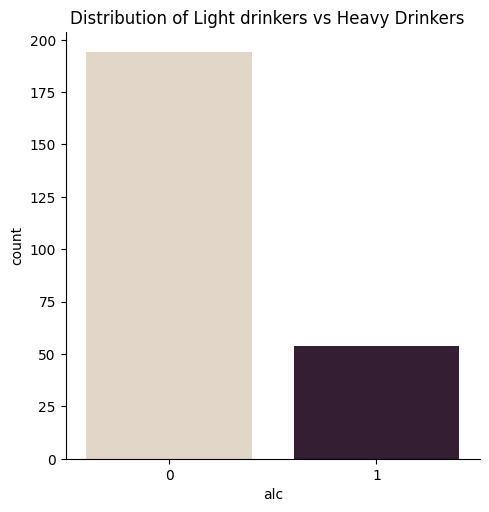

In [13]:
df['alc'] = [0 if x <= 3 else 1 for x in df['week_alc']]
        
print(df['alc'].value_counts())
print(df['alc'].value_counts(normalize = True))


sns.catplot(x="alc", kind="count", palette="ch:.25", data=df)
plt.title('Distribution of Light drinkers vs Heavy Drinkers  ')

In [14]:
X_df = df.drop(columns = ['Dalc', 'Walc', 'week_alc', 'alc','school'], axis = 1) # grabs everything else but 'default column'
y = df['alc']
orig_feats = list(X_df.columns)
len(orig_feats)

30

In [15]:
def graph(col):
    fig, ax = plt.subplots(1, 2, figsize= (10,6))
    sns.despine(right=True)
    sns.countplot(x=col, data=df,  ax = ax[0])
    sns.barplot(x=col, y = 'week_alc', data=df,  ax = ax[1])

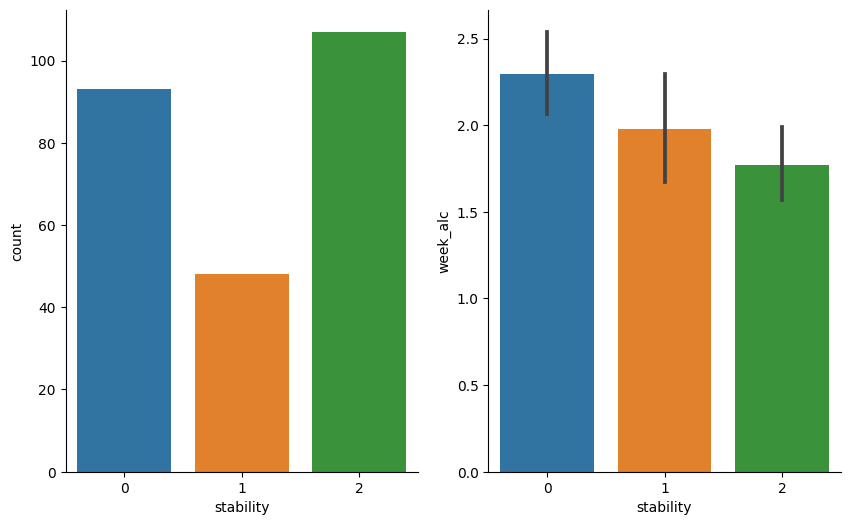

In [16]:
df['stability'] = (df['famrel'] * df['famsize'])//2
graph('stability')

In [17]:
#df['stability']= [0 if x <= 3 else 1 for x in df['stability']]


In [18]:
df['academic_support'] = df.famsup + df.schoolsup+df.higher

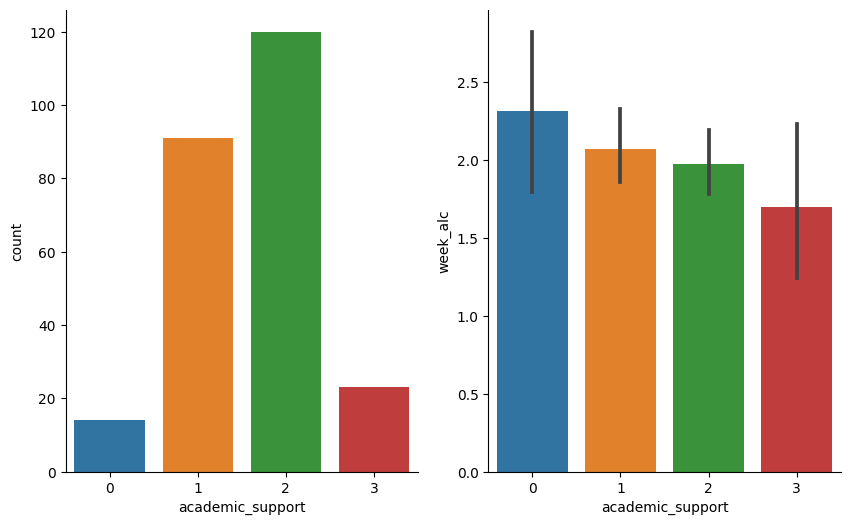

In [19]:
#df.higher
graph('academic_support')


In [20]:
df['idle'] = (df.goout+df.freetime)//3

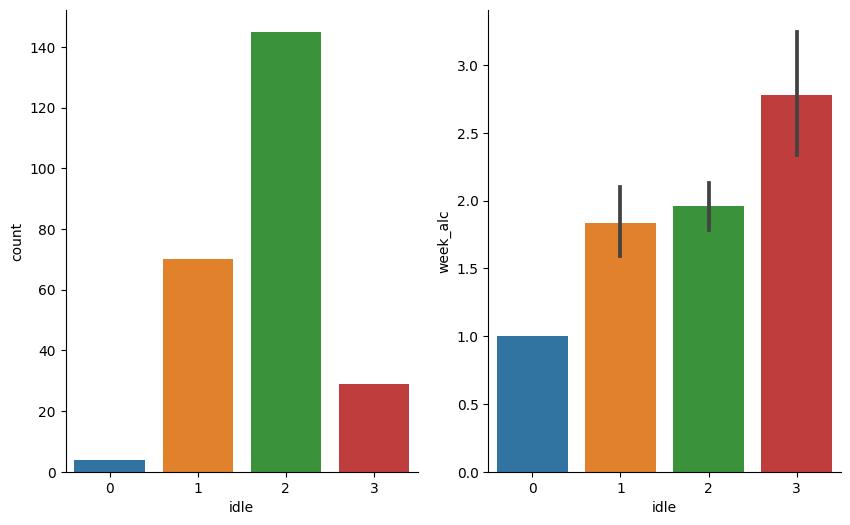

In [21]:
graph('idle')

In [22]:
df['grade_avg'] = round((df.G1 + df.G2 + df.G3)/3, 2)

In [23]:
df['delinquency'] = ((df['failures']) * df['absences'])

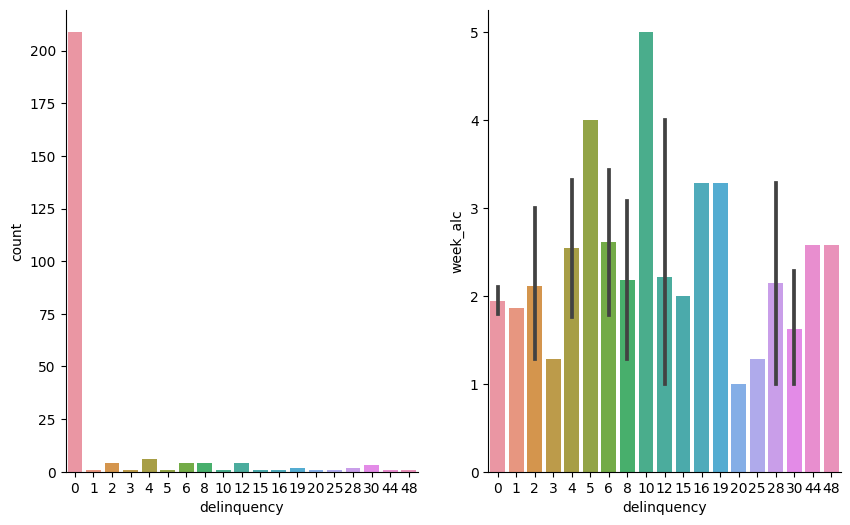

In [24]:
graph('delinquency')

In [25]:
df_cp = df.copy()

In [26]:
df.drop(columns = ['week_alc', 'Dalc', 'Walc','alc'], axis = 1, inplace = True)


In [27]:
X = df


In [28]:
print(X.shape)
print(y.shape)

(248, 36)
(248,)


In [29]:
#performing train-test split on main dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

Training set - Features:  (198, 36) Target:  (198,)
Test set - Features:  (50, 36) Target:  (50,)
0    0.762626
1    0.237374
Name: alc, dtype: float64
0    0.86
1    0.14
Name: alc, dtype: float64


In [30]:
# concatenate our training data back together
training  = pd.concat([X_train, y_train], axis=1)

In [31]:
# separate minority and majority classes
light_drinker = training[training.alc==0]
heavy_drinker = training[training.alc==1]

# Get a class count to understand the class imbalance.
print('light drinker count: '+ str(len(light_drinker)))
print('heavy drinker count: '+ str(len(heavy_drinker)))

light drinker count: 151
heavy drinker count: 47


In [32]:
from sklearn.utils import resample

In [33]:
# upsample minority
heavy_drinker_upsampled = resample(heavy_drinker,
                          replace=True, # sample with replacement
                          n_samples=len(light_drinker), # match number in majority class
                          random_state=25) # reproducible results
heavy_drinker_upsampled.shape

(151, 37)

In [34]:
# combine majority and upsampled minority
upsampled = pd.concat([light_drinker, heavy_drinker_upsampled])

# check new class counts
upsampled.alc.value_counts()


0    151
1    151
Name: alc, dtype: int64

In [35]:
#upsampled.info()

In [36]:
# trying logistic regression again with the balanced dataset
y_train_up = upsampled.alc
X_train_up = upsampled.drop(columns = 'alc', axis=1)
#X_train_up.drop(columns = dummy_feats, axis=1, inplace=True)
X_train_up.shape
#print(y_train_up.value_counts(normalize = True))
#print(X_train_up.value_counts(normalize = True))



(302, 36)

In [37]:
#setting parameters to choose the best 10 variables based on the significance of the variable F stat
selector = SelectKBest(f_classif, k=10) #setting parameters to choose the best 10 variables based on the significance of the variable F stat

#Fitting selector object to training set
selector.fit(X_train_up, y_train_up)

selected_columns = X_train_up.columns[selector.get_support()]
removed_columns = X_train_up.columns[~selector.get_support()]

X_train = X_train_up[selected_columns]
X_test = X_test[selected_columns]
print(X_train.shape, X_test.shape)


(302, 10) (50, 10)


In [38]:
p,q = 0,0
top = 0
acc = 0

for i in range(10,50):
    for j in range(4,15):
        classifier = RandomForestClassifier(random_state = 4,n_estimators = i,max_depth = j, min_samples_split =2 ,  min_samples_leaf = 1)
        classifier.fit(X_train, y_train_up)
        prediction = classifier.predict(X_test)
        acc = accuracy_score(y_test, classifier.predict(X_test))
        from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
    
        if acc>top:
            top = acc
            p,q = i,j
        

# Random Forest Classifier

In [39]:
classifier = RandomForestClassifier(random_state = 4,n_estimators = p,max_depth = q, min_samples_split =2 ,  min_samples_leaf = 1)

classifier.fit(X_train, y_train_up)

pred_test = classifier.predict(X_test)
pred_train = classifier.predict(X_train)
print()

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
print('Accuracy of Random Forest classifier: {:.3f} \n'.format(accuracy_score(y_test,pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))


Accuracy of Random Forest classifier: 0.940 

Confusion Matrix: 

[[42  1]
 [ 2  5]]


# Decision Trees Classifier

In [42]:
classifier = DecisionTreeClassifier(max_depth=15)
classifier.fit(X_train, y_train_up)

pred_test = classifier.predict(X_test)
pred_train = classifier.predict(X_train)
print()

from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
print('Accuracy of : {:.3f} \n'.format(accuracy_score(y_test,pred_test)))
print("Confusion Matrix: \n")
print(confusion_matrix(y_test, pred_test))


Accuracy of : 0.780 

Confusion Matrix: 

[[34  9]
 [ 2  5]]


# Dependent Variables

In [41]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 520 to 605
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         302 non-null    int32
 1   age         302 non-null    int32
 2   famsize     302 non-null    int32
 3   traveltime  302 non-null    int32
 4   studytime   302 non-null    int32
 5   goout       302 non-null    int32
 6   absences    302 non-null    int32
 7   G1          302 non-null    int32
 8   stability   302 non-null    int32
 9   idle        302 non-null    int32
dtypes: int32(10)
memory usage: 14.2 KB
